In [3]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray ,gray2rgb
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, disk, binary_erosion, binary_dilation
from skimage.filters import threshold_otsu
from skimage.transform import rescale
from skimage.draw import circle

Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

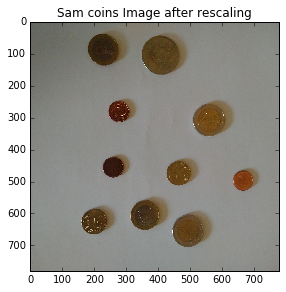

In [4]:
Path = './images/'
samcoins = 'coins.jpg'
samcoins = imread(Path.__add__(samcoins)) 
samcoinsubyte = img_as_ubyte(samcoins) 
samcoinsscaled = rescale(samcoinsubyte,1/4)


imshow(samcoinsscaled) 
plt.title('Sam coins Image after rescaling')

Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

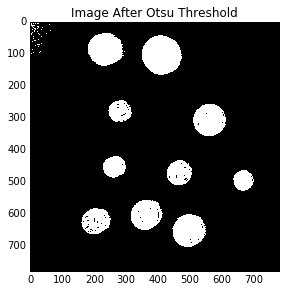

In [5]:
samcoinsgray=rgb2gray(samcoinsscaled)
plt.figure() 
imshow(samcoinsgray)

samglobalotsu = threshold_otsu(samcoinsgray)
samotsu = samcoinsgray <= samglobalotsu  
imshow(samotsu) 
plt.title('Image After Otsu Threshold')

Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

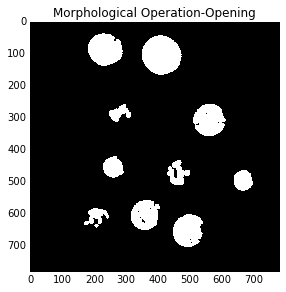

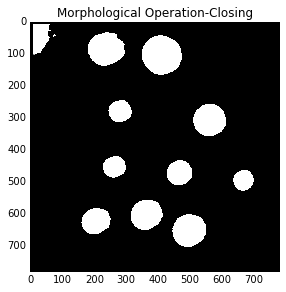

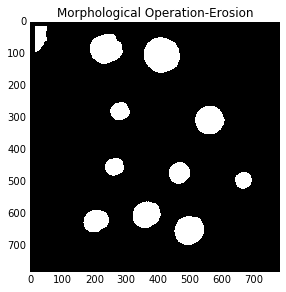

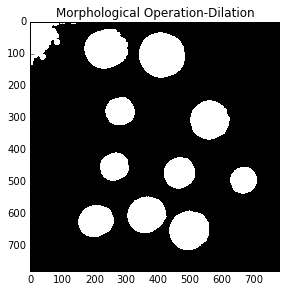

In [6]:
samerosion = disk(6)
samdilation = disk (10)

opening = binary_opening(samotsu,samerosion , out = None)
closing = binary_closing(samotsu,samdilation , out = None)
erosion = binary_erosion(closing,samerosion , out = None)
dilation = binary_dilation(samotsu,samdilation , out = None)

plt.figure()
imshow(opening)
plt.title('Morphological Operation-Opening')

plt.figure()
imshow(closing)
plt.title('Morphological Operation-Closing')

plt.figure()
imshow(erosion)
plt.title('Morphological Operation-Erosion')

plt.figure()
imshow(dilation)
plt.title('Morphological Operation-Dilation')


Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

C:\Users\Usama\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


Number of Detected Regions = 11 


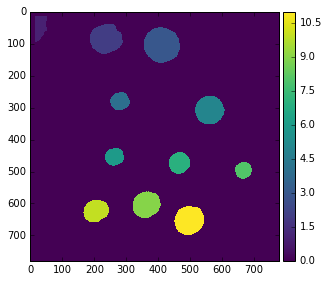

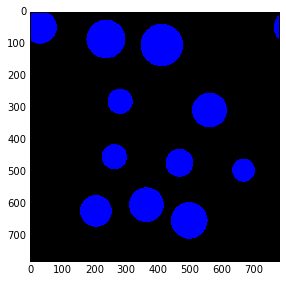

In [10]:
from skimage.measure import label, regionprops
Image , Regions  = label(erosion , return_num= True ,connectivity=1)

plt.figure()
imshow(Image)  
print ("Number of Detected Regions = %d " %Regions)

samimage = regionprops(Image) 
circlesofsam = gray2rgb(img_as_ubyte(erosion))

for label in samimage:
    for i in range(10): 
        [rr,cc] = circle(
            float(label["centroid"][0]), 
            float(label["centroid"][1]), 
            float(label["major_axis_length"]/2)+i
        )

        circlesofsam[rr,cc] = (0,0,255)
        #It is used to color the circles
        
plt.figure()
imshow(circlesofsam)

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

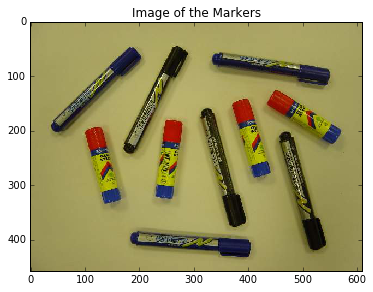

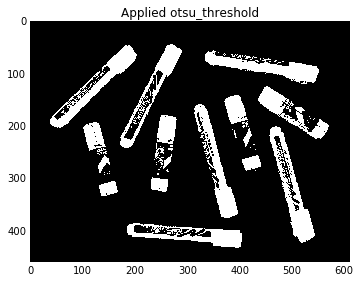

In [8]:

Path = './images/'
samobjects = 'objets4.jpg' 
sammarkers = imread(Path.__add__(samobjects)) 

plt.figure()
imshow(sammarkers)
plt.title('Image of the Markers')


sammarkersbyte = img_as_ubyte(sammarkers)
sammarkersgrey = rgb2gray(sammarkersbyte)

plt.figure()
imshow(sammarkersgrey) 
plt.title('Grey Image of the Markers')


markersglobalotsu = threshold_otsu(sammarkersgrey)
sammarkersotsu = sammarkersgrey < markersglobalotsu
imshow(sammarkersotsu) 
plt.title('Applied otsu_threshold')

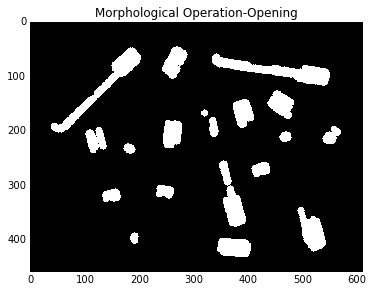

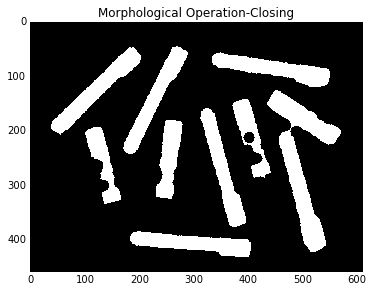

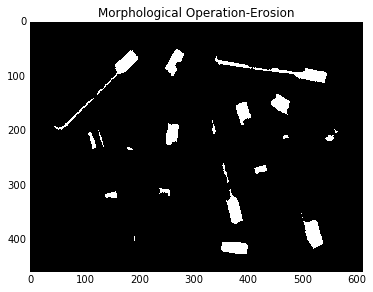

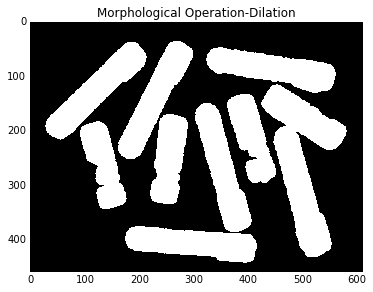

In [9]:
samerosion2 = disk(6)
samdilation2 = disk (10)

opening2 = binary_opening(sammarkersotsu,samerosion2)
closing2 = binary_closing(sammarkersotsu ,samdilation2, out = None)
erosion2 = binary_erosion(sammarkersotsu,samerosion2 , out = None)
dilation2 = binary_dilation(sammarkersotsu,samdilation2 , out = None)

plt.figure()
imshow(opening2)
plt.title('Morphological Operation-Opening')

plt.figure()
imshow(closing2)
plt.title('Morphological Operation-Closing')

plt.figure()
imshow(erosion2)
plt.title('Morphological Operation-Erosion')

plt.figure()
imshow(dilation2)
plt.title('Morphological Operation-Dilation')


C:\Users\Usama\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


Number of Detected Regions(Total Number of Objects) =  9 
Markers Count are 5
Gum Counts are : 4


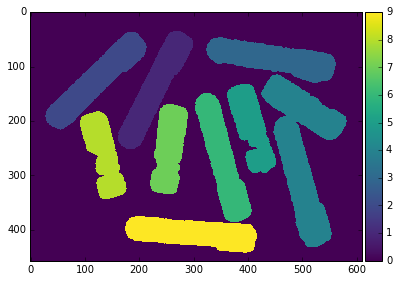

In [14]:
from skimage.measure import label, regionprops
Image2 , Regions2  = label(dilation2, return_num= True)
plt.figure()
imshow(Image2)  
print ("Number of Detected Regions(Total Number of Objects) =  %d " %Regions2)

MarkersCount = 0
GlueCount = 0

samimage2 = regionprops(Image2)

for j in samimage2:
    if(j["area"] > 580): 
        if(j["eccentricity"] > 0.97): 
            MarkersCount += 1
        else: 
            GlueCount += 1

print("Markers Count are %d"%MarkersCount)
print("Gum Counts are : %d"%GlueCount)